## Biological Interpretation

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr
import networkx as nx
from scipy.stats import hypergeom

In [6]:
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

In [7]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")

In [137]:
dep = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_dependencyQ1.csv")

In [139]:
dep = dep.rename(columns={'Unnamed: 0': "DepMap_ID"})

In [140]:
dep.head()

,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000004,0.001162,0.004324,0.102193,0.016170,0.008121,0.088762,0.000058,0.429304,0.000147,...,0.055923,0.466373,NaN,NaN,0.000296,0.000451,0.373209,0.000166,0.000504,0.055706
1,ACH-000005,0.029862,0.001012,0.001901,0.002216,0.076663,0.190601,0.000796,0.540483,0.027229,...,0.073774,0.277175,0.061449,0.030920,0.001480,0.029860,0.032814,0.007972,0.010963,0.105758
2,ACH-000007,0.003344,0.002897,0.016722,0.000987,0.002387,0.001097,0.003689,0.427550,0.009420,...,0.024630,0.136330,0.014167,0.001625,0.000372,0.009067,0.219959,0.002697,0.289634,0.363803
3,ACH-000009,0.002467,0.007812,0.014645,0.002586,0.003985,0.003944,0.005325,0.660004,0.000510,...,0.240742,0.149868,0.010402,0.001351,0.001216,0.003866,0.598618,0.000175,0.030937,0.558687
4,ACH-000011,0.000215,0.003745,0.009204,0.000017,0.016307,0.123272,0.002735,0.331724,0.001798,...,0.322568,0.481664,0.043777,0.040773,0.000263,0.001432,0.107410,0.002298,0.125703,0.283378


In [27]:
def pretty_gene_names(dataset):
    mapping = {}

    for i in np.arange(0,data.shape[0],1):
        mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

    dataset["INDEX"] = dataset.DepMap_ID
    dataset = dataset.set_index('INDEX')
    dataset = dataset.rename(index=mapping)

    # "DepMap_ID
    dataset = dataset.drop("DepMap_ID",1)

    gene = dataset.columns.to_list()
    # split at space
    for i in range(len(gene)):
        gene[i] = gene[i].split(" ") 

    genes = []
    for i in range(len(gene)):
        genes.append(gene[i][0])
    
    dataset.columns = genes
    return dataset

In [131]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)
effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
                 
effect.columns = genes


cellLine = effect.index.to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines = []
for i in range(len(cellLine)):
    cellLines.append(cellLine[i][0])
    
effect.index = cellLines

cellLine = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines1 = []
for i in range(len(cellLine)):
    cellLines1.append(cellLine[i][0])
    
data['CCLE_Name'] = cellLines1


a = set(cellLines)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c
allGenes = effect[effect.columns.intersection(cellL)]

765
1781
765


In [9]:
dep = pretty_gene_names(dep)

NameError: name 'dep' is not defined

In [28]:
effect = pretty_gene_names(effect)

In [16]:
effect["CDK6"].sort_values(ascending=False)

INDEX
CME1_SOFT_TISSUE                               0.325317
OS252_BONE                                     0.275941
MONOMAC1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    0.235966
TC71_BONE                                      0.212008
TC32_BONE                                      0.211519
                                                 ...   
U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE       -1.598968
OCIMY5_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     -1.643574
THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE       -1.795163
AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     -2.056662
DB_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE         -2.475259
Name: CDK6, Length: 769, dtype: float64

In [135]:
mydict = {'CDK6': effect['CDK6']}

In [136]:
mydict['CDK6'].sort_values()

DB         -2.475259
AML193     -2.056662
THP1       -1.795163
OCIMY5     -1.643574
U937       -1.598968
              ...   
TC32        0.211519
TC71        0.212008
MONOMAC1    0.235966
OS252       0.275941
CME1        0.325317
Name: CDK6, Length: 769, dtype: float64

In [20]:
sum(effect['CDK6'])/effect.shape[0]

-0.5735323955919767

In [21]:
sum(effect['TP53'])/effect.shape[0]

0.20346155241225025

In [22]:
sum(effect['PTEN'])/effect.shape[0]

0.6580655188818638

In [23]:
sum(effect['NF2'])/effect.shape[0]

0.19109198873156022

In [132]:
sum(effect['CDK4'])/effect.shape[0]

-0.5940105343532418

In [25]:
sum(effect['CCND3'])/effect.shape[0]

-0.3250483587415961

In [28]:
effect['CCND1'].sum(skipna=True)/effect.shape[0]

-1.0090272209573807

In [31]:
ts_onko_classification = [effect[x].sum(skipna=True)/effect.shape[0] for x in UL2]

In [47]:
ts_onko_classification

[0.3364741181721983,
 -1.0090272209573807,
 0.3053809753440284,
 -0.06251851177977061,
 0.21738211555938453,
 0.19566253935678107,
 -0.2494111402572198,
 0.20124377612742103,
 -0.7101323237670938,
 -0.16379940929954362,
 0.29391487233478925,
 0.015580832744331181,
 -0.5940105343532422,
 0.11068116329210767,
 -0.5735323955919767,
 -0.32504835874159627,
 -0.12106787223768048,
 0.19109198873156022,
 -0.2447267330102672,
 0.658065518881864,
 -0.34342369015940966]

In [41]:
[x < 0 for x in ts_onko_classification]

[False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True]

In [138]:
mydict = {}
for _ in UL2:
    if effect[_].sum(skipna=True)/effect.shape[0] > 0:
        mydict[_] = effect[_].sort_values(ascending=False)
    else:
        mydict[_] = effect[_].sort_values()

In [139]:
mydict['NF2']

OV7         2.944634
NCIH2030    2.565659
DKMG        2.339770
SNU668      2.223295
TOV21G      1.965334
              ...   
DANG       -0.900812
SG231      -0.926342
RHJT       -1.079622
HCC1428    -1.109713
RH28       -1.289142
Name: NF2, Length: 769, dtype: float64

In [146]:
cdk4_list = mydict['CDK4'].index.to_list()

In [148]:
cdk4_df = pd.DataFrame(cdk4_list)

In [147]:
rb1_list = mydict['RB1'].index.to_list()
rb1_df = pd.DataFrame(rb1_list)

In [70]:
# how to add the ranks in a meaningful way - it's combinatorial again.
# 
#nf2_df.index + rb1_df.index

# better question is how do i add the lists and still retain which pairs were used. 
# for example 5+1 is below 4+3, but 1 is already in the list anyway.
# also 10+1 should be lower then 6+7, but 6 and 7 will anyway be in the list no matter what.
# i can tame the combinatorial explosion by noting that only 75 can maximally be in the list.
# and most likely we will start with 35.

Int64Index([   0,    2,    4,    6,    8,   10,   12,   14,   16,   18,
            ...
            1518, 1520, 1522, 1524, 1526, 1528, 1530, 1532, 1534, 1536],
           dtype='int64', length=769)

In [149]:
ranked_index = {}
for _ in rb1_df.index:
    for j in cdk4_df.index:
        ranked_index[rb1_df.values[_][0] + '__' + cdk4_df.values[j][0]] = _ + j

In [108]:
rb1_df.values[1][0]

'BIN67_OVARY'

In [157]:
ranked_index

AttributeError: 'dict' object has no attribute 'sort'

In [158]:
dataX = [v for v in sorted(ranked_index.items(), key=lambda item: item[1])]
dataX

[('JHUEM1__VCAP', 0),
 ('JHUEM1__MDAMB415', 1),
 ('BIN67__VCAP', 1),
 ('JHUEM1__NCIH2887', 2),
 ('BIN67__MDAMB415', 2),
 ('SCCOHT1__VCAP', 2),
 ('JHUEM1__SNU1544', 3),
 ('BIN67__NCIH2887', 3),
 ('SCCOHT1__MDAMB415', 3),
 ('TTC642__VCAP', 3),
 ('JHUEM1__HCC1419', 4),
 ('BIN67__SNU1544', 4),
 ('SCCOHT1__NCIH2887', 4),
 ('TTC642__MDAMB415', 4),
 ('TO14__VCAP', 4),
 ('JHUEM1__MDAMB453', 5),
 ('BIN67__HCC1419', 5),
 ('SCCOHT1__SNU1544', 5),
 ('TTC642__NCIH2887', 5),
 ('TO14__MDAMB415', 5),
 ('NCIH2030__VCAP', 5),
 ('JHUEM1__RDES', 6),
 ('BIN67__MDAMB453', 6),
 ('SCCOHT1__HCC1419', 6),
 ('TTC642__SNU1544', 6),
 ('TO14__NCIH2887', 6),
 ('NCIH2030__MDAMB415', 6),
 ('OCUM1__VCAP', 6),
 ('JHUEM1__FU97', 7),
 ('BIN67__RDES', 7),
 ('SCCOHT1__MDAMB453', 7),
 ('TTC642__HCC1419', 7),
 ('TO14__SNU1544', 7),
 ('NCIH2030__NCIH2887', 7),
 ('OCUM1__MDAMB415', 7),
 ('K029AX__VCAP', 7),
 ('JHUEM1__ES2', 8),
 ('BIN67__FU97', 8),
 ('SCCOHT1__RDES', 8),
 ('TTC642__MDAMB453', 8),
 ('TO14__HCC1419', 8),
 ('NCIH2

In [170]:
ceL = [ x for x in range(0,200) for x in dataX[x][0].split('__')]

In [171]:
ceL = set(ceL)
cel = list(ceL)

In [172]:
len(ceL)

36

In [173]:
ceL

{'BIN67',
 'CHLA266',
 'COGE352',
 'DMS53',
 'ES2',
 'EWS502',
 'FU97',
 'GCIY',
 'HCC1419',
 'HCC2429',
 'HEC1',
 'HS852T',
 'JHUEM1',
 'JHUEM7',
 'JM1',
 'K029AX',
 'LS',
 'MDAMB415',
 'MDAMB453',
 'MEL290',
 'MFE319',
 'NCIH1915',
 'NCIH2030',
 'NCIH2887',
 'NCIH3122',
 'OCUM1',
 'OVMANA',
 'PACADD188',
 'RDES',
 'SCCOHT1',
 'SNU1544',
 'TO14',
 'TTC642',
 'UMUC9',
 'VCAP',
 'WM88'}

## Wir haben 21 listen, die abhaengig von identitaet als onkogen oder tumor suppressor gerankt sind. Dann die ranks der 19 paare addieren und wieder ordnen.
## von diesen werden dann die ersten 5 bzw 10 percent der daten genommen und subtype/primary disease angeschaut und ein signifikanztest gegen den Rest gemacht. (disease enrichment)

In [21]:
UL2 = [i for j in uli_list for i in j]

In [23]:
UL2 = set(UL2)
UL2 = list(UL2)

In [24]:
UL2

['CDKN2C',
 'CCND1',
 'PTPN14',
 'CDKN2A',
 'TAOK1',
 'ABL2',
 'CRK',
 'RB1',
 'RAC1',
 'CCNE1',
 'KIRREL1',
 'CDKN2B',
 'CDK4',
 'AMOTL2',
 'CDK6',
 'CCND3',
 'LATS2',
 'NF2',
 'PKN2',
 'PTEN',
 'DLG5']

In [34]:
len(UL2)

21

In [140]:
effect['CDKN2C']

HEL        0.190767
HEL9217    0.397777
LS513      0.372843
C2BBE1     0.335139
253J       0.356310
             ...   
UACC62     0.200888
SKMEL19    0.279839
MEL285     0.333039
MEL290     0.447823
UCH2       0.254548
Name: CDKN2C, Length: 769, dtype: float64

In [67]:
uli_list

[['CDK4', 'RB1'],
 ['CDK4', 'CDKN2C'],
 ['CDK4', 'CCND1'],
 ['CDK6', 'CCND3'],
 ['CDK6', 'CCNE1'],
 ['CDK6', 'CDK4'],
 ['CDKN2A', 'CDKN2B'],
 ['CDKN2A', 'CCNE1'],
 ['NF2', 'AMOTL2'],
 ['NF2', 'KIRREL1'],
 ['NF2', 'TAOK1'],
 ['NF2', 'LATS2'],
 ['NF2', 'PTPN14'],
 ['NF2', 'PTEN'],
 ['NF2', 'ABL2'],
 ['NF2', 'RAC1'],
 ['NF2', 'CRK'],
 ['NF2', 'DLG5'],
 ['NF2', 'PKN2']]

In [10]:
effect = pretty_gene_names(effect)

In [122]:
dep.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
INDEX,,,,,,,,,,,,,,,,,,,,,
HEL,0.001077,0.004165,0.099131,0.016074,0.007706,0.094475,0.000051,0.424023,0.000171,0.001297,...,0.051060,0.464158,NaN,NaN,0.000318,0.000413,0.370098,0.000170,0.000534,0.056513
HEL9217,0.031810,0.000941,0.001757,0.002469,0.072883,0.192318,0.000846,0.546544,0.025630,0.012892,...,0.077770,0.287207,0.057451,0.025590,0.001161,0.028018,0.035445,0.006416,0.010517,0.112534
LS513,0.003363,0.003201,0.016799,0.001036,0.002243,0.001306,0.003541,0.428076,0.008735,0.000117,...,0.023888,0.130296,0.014906,0.001781,0.000450,0.009249,0.220940,0.002789,0.283513,0.365755
C2BBE1,0.001196,0.007132,0.012727,0.002898,0.001965,0.011081,0.001871,0.690472,0.000536,0.002343,...,0.143244,0.093337,0.025420,0.003602,0.001899,0.004724,0.627729,0.000274,0.024166,0.546863
253J,0.000248,0.003682,0.008251,0.000017,0.015479,0.111049,0.002690,0.330648,0.001618,0.002468,...,0.310653,0.471901,0.043951,0.036127,0.000220,0.001327,0.109074,0.002030,0.118438,0.271464


In [29]:
data.head()

,DepMap_ID,stripped_cell_line_name,CCLE_Name,Alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
0,ACH-000001,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,NaN,NaN,NaN,...,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN
1,ACH-000002,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,NaN,NaN,NaN,...,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,NaN,blood,AML,M3,NaN
2,ACH-000003,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,Male,ATCC,NaN,NaN,NaN,...,NaN,Colon/Colorectal Cancer,Adenocarcinoma,NaN,SIDM00891,NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN
3,ACH-000004,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,Male,DSMZ,2.0,-3.079202,Suspension,...,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN,blood,AML,M6,NaN
4,ACH-000005,HEL9217,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Male,ATCC,2.0,-2.404409,Mixed adherent and suspension,...,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00593,NaN,blood,AML,M6,NaN


CDK4	RB1	-0.270088658037034	AB
CDK4	CDKN2C	-0.332894420570415	AB
CDK4	CCND1	0.383743671693837	BA
CDK6	CCND3	0.429610217617713	BA
CDK6	CCNE1	-0.291627386055655	BA
CDK6	CDK4	-0.166138251188281	BA
CDKN2A	CDKN2B	0.252271039837043	AB
CDKN2A	CCNE1	-0.164517699579397	BA

--------------------------------

NF2	AMOTL2	0.604088180582646	BA
NF2	KIRREL1	0.557319887509312	BA
NF2	TAOK1	0.537086753404031	AB
NF2	LATS2	0.522628225045063	BA
NF2	PTPN14	0.426594811534134	AB
NF2	PTEN	0.280261686290702	AB
NF2	ABL2	0.251003837455685	BA
NF2	RAC1	-0.345269416089392	AB    == in string
NF2	CRK	-0.404878434040191	BA        
NF2	DLG5	-0.405139954747337	BA
NF2	PKN2	-0.445751736055664	AB

In [45]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)
effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
                 
effect.columns = genes


cellLine = effect.index.to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines = []
for i in range(len(cellLine)):
    cellLines.append(cellLine[i][0])
    
effect.index = cellLines

cellLine = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines1 = []
for i in range(len(cellLine)):
    cellLines1.append(cellLine[i][0])
    
data['CCLE_Name'] = cellLines1


a = set(cellLines)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c
allGenes = effect[effect.columns.intersection(cellL)]

765
1781
765


## allGenes

In [ ]:
# define allgenes as an intersection of the cell Lines that are annotated by Ryan and the ones in DepMap.
effect = effect.transpose()
allGenes = effect[effect.columns.intersection(cellL)]
allGenes = allGenes.transpose()

In [52]:
allGenes.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


In [41]:
data = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")

temp1 = data['CCLE_NAME'].to_list()
# split at space
for i in range(len(temp1)):
    temp1[i] = temp1[i].split("_") 

temp2 = []
for i in range(len(temp1)):
    temp2.append(temp1[i][0])

In [18]:
allGenes = effect[effect.columns.intersection(cellL)]

In [93]:
effect = effect.transpose()
intersect = list(set.intersection(set(allGenes.index.to_list()), set(cellL)))
allGenes = effect[effect.columns.intersection(cellL)]

allGenes.shape
allGenes = allGenes.transpose()

allGenes.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


In [34]:
data = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")

,CCLE_NAME,TISSUE_FACTOR,MSI,ACVR1B_mut_del,APC_mut_del,ARID1A_mut_del,ATM_mut_del,ATRX_mut_del,AXIN1_mut_del,BAP1_mut_del,...,PIK3CA_mut,BRAF_mut,CTNNB1_mut,KRAS_mut,NRAS_mut,GNAS_mut,HRAS_mut,EGFR_mut,MAP2K1_mut,PTPN11_mut
0,MOLM16_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PATU8988S_PANCREAS,PANCREAS,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,RCHACV_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,SKMEL31_SKIN,SKIN,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,SKBR3_BREAST,BREAST,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [161]:
def celllines_from_diff1(gene_a,gene_b):
    def diff(gene_a,gene_b):
        """ takes 2 genes and returns the cell lines
        for which those two genes have a high correlation
        or anticorrelation in gene effect"""
        diff = np.abs(effect[gene_a] - effect[gene_b])
        return (diff) 
    diff1 = diff(gene_a,gene_b)
    diff1_top = diff1.sort_values().tail(20).index.to_list()
    diff1_bottom = diff1.sort_values().head(20).index.to_list()
    print('first is top, second is bottom')
    plt.plot(diff1.sort_values())
    return([diff1_top,diff1_bottom])

def celllines_from_sums1(gene_a,gene_b):
        def summ(gene_a,gene_b):
            summ = np.abs(effect[gene_a] + effect[gene_b])
            return summ
        summ1 = summ(gene_a,gene_b)
        summ1_top = summ1.sort_values().tail(20).index.to_list()
        summ1_bottom = summ1.sort_values().head(20).index.to_list()
        print('first is top, second is bottom')
        return([summ1_top,summ1_bottom])

In [239]:
def process_diff1(gene_a,gene_b):
    diff = np.abs(allGenes[gene_a] - allGenes[gene_b])
    diff_top = diff.sort_values().tail(30).index.to_list()
    diff_bottom = diff.sort_values().head(30).index.to_list()
    allGenesSet = set(allGenes.index.to_list())
    top_group = diff_top
    rest_top_group = list(allGenesSet.difference(set(top_group)))
    bottom_group = diff_bottom
    rest_bottom_group = list(allGenesSet.difference(set(bottom_group)))
    return([top_group,rest_top_group,bottom_group,rest_bottom_group])

In [ ]:
def process_summ1(gene_a,gene_b):
    summ = np.abs(allGenes[gene_a] + allGenes[gene_b])
    summ_top = summ.sort_values().tail(30).index.to_list()
    summ_bottom = summ.sort_values().head(30).index.to_list()
    allGenesSet = set(allGenes.index.to_list())
    top_group = summ_top
    rest_top_group = list(allGenesSet.difference(set(top_group)))
    bottom_group = summ_bottom
    rest_bottom_group = list(allGenesSet.difference(set(bottom_group)))
    return([top_group,rest_top_group,bottom_group,rest_bottom_group])

In [19]:
def process_diff(gene_a,gene_b):
    diff = np.abs(allGenes[gene_a] - allGenes[gene_b])
    diff_top = diff.sort_values().tail(30).index.to_list()
    allGenesSet = set(allGenes.index.to_list())
    rest_top_group = list(allGenesSet.difference(set(diff_top)))
    return([diff_top,rest_top_group])

In [20]:
def process_summ(gene_a,gene_b):
    summ = np.abs(allGenes[gene_a] + allGenes[gene_b])
    summ_top = summ.sort_values().tail(30).index.to_list()
    allGenesSet = set(allGenes.index.to_list())
    rest_top_group = list(allGenesSet.difference(set(summ_top)))
    return([summ_top,rest_top_group])

In [144]:
dep['NF2'].tail()

INDEX
A375       0.000000
UACC62          NaN
SKMEL19    0.883308
MEL285     0.011317
UCH2       0.089090
Name: NF2, dtype: float64

## make a good dataframe that appends the subtype and the primary_disease to the values calculated for the pairs

we have to make sure to do the correct calculations for ++, +- and --
* for the -- ones, we need the product of the dependencies
* for the ++ ones, we rank and sum
* for the +- we see where we get, by looking at sum and average, or we already rank according to correlation.

In [233]:
def dependency_product(gene_a,gene_b):
    depprod = dep[gene_a]*dep[gene_b]
    # get rid of nans !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    depprod = depprod.sort_values().tail(30).to_list()
    
    # [[row[i] for row in matrix] for i in range(2)]
    #depprod = pd.DataFrame(depprod)
    df1 = [data[data['CCLE_Name'].str.match(_)]['Subtype'].values for _ in depprod]
    df2 = [data[data['CCLE_Name'].str.match(_)]['primary_disease'].values for _ in depprod]
    
    depp = []
    for _ in range(len(depprod)):
        depp.append([depprod[_],df1[_],df2[_]])
    #print(df1.shape)
    #print(df2.shape)
    #depprod = pd.concat([depprod,pd.DataFrame(df1)])
    #depprod = pd.concat([depprod,pd.DataFrame(df2)])
 #   print(data[data['CCLE_Name'].str.match(_)]['primary_disease'])
    return(depp)

In [ ]:
# what we want:

# ranking the lists depending on whether the gene is a ts or onkogene

In [235]:
dependency_product('CDK4','CDK6')

TypeError: first argument must be string or compiled pattern

In [223]:
dependency_product('CDK4','CDK6')[60:90]

p_values.append([a,b,corr,mut,p_value_sum,p_value_diff,])
result = pd.DataFrame(p_values)
result.to_csv('hypergeometric_p_values_new.csv')

,0
0,[Lymphoma]
1,[Lung Cancer]
2,[Kidney Cancer]
3,[Bile Duct Cancer]
4,[Brain Cancer]
5,[Ovarian Cancer]
6,[Bile Duct Cancer]
7,[Thyroid Cancer]
8,[Gastric Cancer]
9,[Lung Cancer]


In [214]:
[data[data['CCLE_Name'].str.match('ICC15')]['primary_disease'].values]

[array(['Bile Duct Cancer'], dtype=object)]

In [145]:
dependency_product('NF2','CDK4')

INDEX
ICC15        0.581190
JHOS4        0.614906
PACADD137    0.628592
NCIH727      0.643749
EFM19        0.694779
COLO792      0.704506
SG231        0.764649
SW837        0.772000
HCC1428      0.986079
UACC62            NaN
dtype: float64

In [143]:
for _ in uli_list2:
    print(dependency_product(_[0],_[1]))

INDEX
PLCPRF5     0.086489
HCC827      0.095728
CASKI       0.097929
RHJT        0.154865
MIAPACA2    0.166192
SG231       0.180023
RH28        0.244061
SW620       0.314513
D283MED     0.330983
UACC62           NaN
dtype: float64
INDEX
SG231       0.010266
RHJT        0.014160
D283MED     0.016214
NCIH2052    0.019378
EMTOKA      0.021873
KYSE450     0.022899
COLO678     0.025695
SNU503      0.046652
RH28        0.118459
UACC62           NaN
dtype: float64
INDEX
NCIH1092     0.045431
PANC1        0.049259
NCIH727      0.060510
RHJT         0.105773
RERFLCAD1    0.136818
D283MED      0.138231
ICC15        0.172842
RH28         0.197329
SCMCRM2      0.372260
UACC62            NaN
dtype: float64
INDEX
TC138      0.225725
ICC106     0.250253
COLO792    0.307955
ICC15      0.345494
SKMEL19    0.413476
CASKI      0.447787
RHJT       0.499351
JHOS4      0.623121
SF268      0.667353
UACC62          NaN
dtype: float64
INDEX
SF268      0.003046
EFM19      0.003086
RHJT       0.003095
S117      

In [103]:
uli_list2 = [['NF2','AMOTL2'],['NF2','KIRREL1'],['NF2','TAOK1'],['NF2','LATS2'],['NF2','PTPN14'],['NF2','PTEN'],
             ['NF2','ABL2'],['NF2','RAC1'],['NF2','CRK'],['NF2','DLG5'],['NF2','PKN2']]

In [30]:
allGenes = allGenes.transpose()

In [32]:
allGenes.shape

(769, 4)

In [197]:

sign = quick_corr(col_a,col_b)

if sign < 0:
    a,b,c,d = process_summ(col_a,col_b)
else:
    a,b,c,d = process_diff(col_a,col_b)
print('a is   ', a)
print('c is   ', c)
print(sign)

a is    ['RDES', 'IGR39', 'C32', 'HSC2', 'RVH421', 'MDAMB453', 'JHH5', 'U118MG', 'HGC27', 'OVTOKO', 'OCIAML3', 'CAKI2', 'ICC8', 'THP1', 'MELHO', 'KMM1', 'NCIH2052', 'RPMI8226', 'NCIH1573', 'HS852T', 'SNU1544', 'VCAP', 'RCC10RGB', 'NCIH2887', 'HEL9217', 'MDAMB415', 'HCC1419', 'AML193', 'SNU308', 'DB']
c is    ['OS252', 'MCC26', 'HEC251', 'LN319', 'ISHIKAWAHERAKLIO02ER', 'CME1', '5637', 'DU4475', 'SW756', 'UMUC7', 'MPP89', 'EMTOKA', 'CAOV3', 'NCIH82', 'KMBC2', 'NCIH2110', 'NCO2', 'KYSE270', 'CORL47', 'ESS1', 'Y79', 'MDAMB436', 'SNU1033', 'UW228', 'OAW28', 'NCIH1155', 'SNU626', 'KLE', 'JHUEM1', 'OVMANA']
-0.16613825118828093


In [196]:
col_a = 'CDK4'
col_b = 'CDK6'


def quick_corr(a,b):
    nas = np.logical_or(np.isnan(effect[a]), np.isnan(effect[b]))
    corr = pearsonr(effect[a][~nas], effect[b][~nas])
    return corr[0]

In [133]:
test = quick_corr('CDK4','CDKN2C')
type(test)

numpy.float64

In [61]:
uli_list1 = [['CDK4','RB1'],
['CDK4','CDKN2C'],
['CDK4','CCND1'],
['CDK6','CCND3'],
['CDK6','CCNE1'],
['CDK6','CDK4'],
['CDKN2A','CDKN2B'],
['CDKN2A','CCNE1']]


uli_list2 = [['NF2','AMOTL2'],
['NF2','KIRREL1'],
['NF2','TAOK1'],
['NF2','LATS2'],
['NF2','PTPN14'],
['NF2','PTEN'],
['NF2','ABL2'],
['NF2','RAC1'],
['NF2','CRK'],    
['NF2','DLG5'],
['NF2','PKN2']]

In [2]:
uli_list = [['CDK4','RB1'],['CDK4','CDKN2C'],['CDK4','CCND1'],['CDK6','CCND3'],['CDK6','CCNE1'],['CDK6','CDK4'],['CDKN2A','CDKN2B'],
['CDKN2A','CCNE1'],['NF2','AMOTL2'],['NF2','KIRREL1'],['NF2','TAOK1'],['NF2','LATS2'],['NF2','PTPN14'],['NF2','PTEN'],['NF2','ABL2'],['NF2','RAC1'],['NF2','CRK'],['NF2','DLG5'],['NF2','PKN2']]

In [226]:
column_names_uli_list = ['CDK4/RB1','CDK4/CDKN2C','CDK4/CCND1','CDK6/CCND3','CDK6/CCNE1','CDK6/CDK4','CDKN2A/CDKN2B',
'CDKN2A/CCNE1','NF2/AMOTL2','NF2/KIRREL1','NF2/TAOK1','NF2/LATS2','NF2/PTPN14','NF2/PTEN','NF2/ABL2','NF2/RAC1','NF2/CRK','NF2/DLG5','NF2/PKN2']

In [36]:
allGenesSet = set(allGenes.columns)
group2 = allGenesSet.difference(set(a))

len(group2)

4

In [37]:
allGenes.columns = group2

In [38]:
allGenes.head()

,NOMO1,HLF,F5,GSS
HEL,0.120775,-0.203970,-0.119021,0.180186
HEL9217,0.223415,0.024702,0.057774,0.073009
LS513,-0.128387,0.204541,-0.196374,-0.004085
C2BBE1,0.141530,0.140602,-0.183496,0.201238
253J,-0.062784,0.247899,-0.040568,0.102339


*    M is the population size
*    n is the number of successes in the population
*    N is the sample size
*    X is still the number of drawn “successes”

pval = hypergeom.sf(4, 783, 121, 20)
pval

In [ ]:
from scipy.stats import hypergeom
pval = hypergeom.sf(x-1, M, n, N)
(x-1,783,totalhits,20)

In [80]:
from scipy.stats import hypergeom
pval = hypergeom.sf(12-1, 18000, 2000, 20)
pval

1.8349602035035028e-07

In [33]:
#hits = count / len(sample)   - it's just count
# totalCount
len(allGenes.index.to_list())

769

In [108]:
pval = hypergeom.sf(4, 783, 121, 20)
pval

0.1835365353530391

In [236]:
def get_hypergeometric_p_value(count,totalCount,sample_size=30):
    count = count - 1
    pval = hypergeom.sf(count, 783, totalCount, sample_size)
 #  (x-1,783,totalhits,20)
    return pval

In [238]:
def get_hypergeometric_p_values(t1,t2,b1,b2,sample_size=30):
    t1 = t1 - 1
    b1 = b1 - 1    
    pval1 = hypergeom.sf(t1, 783, t2, sample_size)
    pval2 = hypergeom.sf(b1, 783, b2, sample_size)

    return [pval1,pval2]

In [121]:
sample_size = len(top)
get_hypergeometric_p_values(count,totalCount,sample_size)

0.1835365353530391

### functions i need: 
   * celllines from diffs + splitting function
   * get_hypergeometric_p_values
   * np.sort, or df.sort_by() after converting to DataFrame

In [148]:
data.head()

,CCLE_NAME,TISSUE_FACTOR,MSI,ACVR1B_mut_del,APC_mut_del,ARID1A_mut_del,ATM_mut_del,ATRX_mut_del,AXIN1_mut_del,BAP1_mut_del,...,PIK3CA_mut,BRAF_mut,CTNNB1_mut,KRAS_mut,NRAS_mut,GNAS_mut,HRAS_mut,EGFR_mut,MAP2K1_mut,PTPN11_mut
0,MOLM16_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PATU8988S_PANCREAS,PANCREAS,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,RCHACV_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,SKMEL31_SKIN,SKIN,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,SKBR3_BREAST,BREAST,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [171]:
t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff('CDK4','CDKN2C')

first is top, second is bottom


In [156]:


#get_hypergeometric_p_values(counting_hits(cellines_from_diff(GENE1,GENE2),'MUTATION'))

get_hypergeometric_p_values(1,26)

0.49533812655326986

## All the functions combined

In [195]:
#len(uli_list) = 19
a,b = uli_list[16]
mut = "CTNNB1_mut"
t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff(a,b)
top1,top2,bot1,bot2 = counting_hits(t1,t2,b1,b2,mut)
print('for genes ', a, ' and ', b, 'the hypergeometric p value that either top or bottom are enriched in ', mut, ' is ')
get_hypergeometric_p_values2(top1,top2,bot1,bot2)

for genes  NF2  and  CRK the hypergeometric p value that either top or bottom are enriched in  CTNNB1_mut  is 


[1.0, 0.040567230594045746]

In [250]:
a,b = uli_list[6]
mut = "TP53_mut_del"
t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff(a,b)
top1,top2,bot1,bot2 = counting_hits(t1,t2,b1,b2,mut)
print('for genes ', a, ' and ', b, 'the hypergeometric p value that either top or bottom are enriched in ', mut, ' is ')
get_hypergeometric_p_values2(top1,top2,bot1,bot2)

for genes  CDKN2A  and  CDKN2B the hypergeometric p value that either top or bottom are enriched in  TP53_mut_del  is 


[0.9894885815375278, 0.0]

In [213]:
p_values = []
#len(uli_list) = 19
# for all 68 background in second loop
#now only the (sensible) cuttoff matters
for _ in uli_list:
    a,b = _
    mut = "CTNNB1_mut"
    t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff(a,b)
    top1,top2,bot1,bot2 = counting_hits(t1,t2,b1,b2,mut)
    #print('for genes ', a, ' and ', b, 'the hypergeometric p value that either top or bottom are enriched in ', mut, ' is ')
    #print(get_hypergeometric_p_values2(top1,top2,bot1,bot2))
    p_value = get_hypergeometric_p_values2(top1,top2,bot1,bot2)
    p_values.append(p_value)

In [244]:
#len(uli_list) = 19
for _ in uli_list:
    a,b = _
    mut = "TP53_mut_del"
    t1,t2,b1,b2,gene_a,gene_b = celllines_from_diff(a,b)
    top1,top2,bot1,bot2 = counting_hits(t1,t2,b1,b2,mut)
    #print('for genes ', a, ' and ', b, 'the hypergeometric p value that either top or bottom are enriched in ', mut, ' is ')
    #print(get_hypergeometric_p_values2(top1,top2,bot1,bot2))
    p_value = get_hypergeometric_p_values2(top1,top2,bot1,bot2)
    p_values.append(p_value)

In [245]:
p_values

[[1.0, 1.0],
 [0.5587322149719652, 1.0],
 [1.0, 0.5587322149719652],
 [1.0, 0.0062588162151182404],
 [1.0, 0.5587322149719652],
 [0.5587322149719652, 0.5587322149719652],
 [1.0, 0.18549070512557464],
 [1.0, 1.0],
 [0.18549070512557464, 1.0],
 [1.0, 1.0],
 [0.5587322149719652, 1.0],
 [1.0, 0.5587322149719652],
 [1.0, 0.5587322149719652],
 [0.5587322149719652, 0.18549070512557464],
 [1.0, 1.0],
 [1.0, 1.0],
 [1.0, 0.040567230594045746],
 [1.0, 1.0],
 [1.0, 1.0],
 [0.9894885815375278, 0.8278442245423387],
 [0.17739518110672173, 0.6874907961842894],
 [0.99716415167591, 0.9191909141654295],
 [0.9191909141654295, 0.07742640312202885],
 [0.6874907961842894, 0.5105716062275819],
 [0.026079982768720613, 0.5105716062275819],
 [0.9894885815375278, 0.0],
 [0.9680495669027778, 0.0],
 [0.5105716062275819, 0.5105716062275819],
 [0.9680495669027778, 0.9680495669027778],
 [0.6874907961842894, 0.17739518110672173],
 [0.9191909141654295, 0.07742640312202885],
 [0.99716415167591, 0.6874907961842894],
 [0.

In [247]:
uli_list[6]

['CDKN2A', 'CDKN2B']

In [248]:
uli_list[7]

['CDKN2A', 'CCNE1']

In [105]:
19*68

1292

now that we potentially have all the p-values for all pairs and all conditions,
we just need a good cutoff to make sure this is in some way meaningful.

how much do we have?
68 * 19 

In [84]:
daten = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")

daten1 = daten.columns.to_list()
daten1.pop(0)
daten1.pop(0)
daten1

['MSI',
 'ACVR1B_mut_del',
 'APC_mut_del',
 'ARID1A_mut_del',
 'ATM_mut_del',
 'ATRX_mut_del',
 'AXIN1_mut_del',
 'BAP1_mut_del',
 'BRCA1_mut_del',
 'BRCA2_mut_del',
 'CASP8_mut_del',
 'CDC73_mut_del',
 'CDH1_mut_del',
 'CDKN2A_mut_del',
 'CEBPA_mut_del',
 'CIC_mut_del',
 'CREBBP_mut_del',
 'CYLD_mut_del',
 'DAXX_mut_del',
 'EP300_mut_del',
 'AMER1_mut_del',
 'FBXW7_mut_del',
 'GATA1_mut_del',
 'HNF1A_mut_del',
 'KDM6A_mut_del',
 'MAP3K1_mut_del',
 'MEN1_mut_del',
 'MLH1_mut_del',
 'KMT2C_mut_del',
 'MSH2_mut_del',
 'MSH6_mut_del',
 'NF1_mut_del',
 'NF2_mut_del',
 'NOTCH1_mut_del',
 'NOTCH2_mut_del',
 'NPM1_mut_del',
 'PAX5_mut_del',
 'PIK3R1_mut_del',
 'PTCH1_mut_del',
 'PTEN_mut_del',
 'RB1_mut_del',
 'RUNX1_mut_del',
 'SMAD2_mut_del',
 'SMAD4_mut_del',
 'SMARCA4_mut_del',
 'SMARCB1_mut_del',
 'SOCS1_mut_del',
 'STK11_mut_del',
 'TET2_mut_del',
 'TNFAIP3_mut_del',
 'TP53_mut_del',
 'TSC1_mut_del',
 'VHL_mut_del',
 'WT1_mut_del',
 'ERBB2_amp',
 'CCND1_amp',
 'MDM2_amp',
 'MYC_amp',
 '

In [104]:
# we need to get the sign first and call the appropriate celllines from sum/diff function for every pair. try this for 2 pairs and part of the backgrounds

for _ in uli_list:
    for i in daten1:
        a,b = _
        mut = i
        t1,t2,b1,b2,gene_a,gene_b = celllines_from_diffORsumm(a,b)
        top1,top2,bot1,bot2 = counting_hits(t1,t2,b1,b2,mut)
        #print('for genes ', a, ' and ', b, 'the hypergeometric p value that either top or bottom are enriched in ', mut, ' is ')
        #print(get_hypergeometric_p_values2(top1,top2,bot1,bot2))
        p_value = get_hypergeometric_p_values2(top1,top2,bot1,bot2)
        p_values.append([a,b,p_value])

In [ ]:
# alle 2400 hypergeometic p-values. check which ones are significant
# the significant ones can be further studied by looking at phenotypes and primary diseases, which
# are also annotated in the samples-info file from depmap.
p_values
result = pd.DataFrame(p_values)
result.to_csv('hypergeometric_p_values.csv')

In [108]:
result = pd.DataFrame(data= p_values)
result.index = column_names_uli_list

NameError: name 'column_names_uli_list' is not defined

# Assembling the whole script

In [268]:
## BAUSTELLE!
p_values = []
for _ in uli_list:
    for i in daten1: 
        a,b = _
        mut = i
        corr = quick_corr(a,b)
# should be sign < 0, i just tested if this, counterintuitively, also yield significant hits
        topsum,topsumRest = process_summ(a,b)
        topdiff,topdiffRest = process_diff(a,b)
        topdiffhits,totalD = counting_hits(topdiff,topdiffRest,mut)
        topsumhits,totalS = counting_hits(topsum,topsumRest,mut)
        p_value_sum = get_hypergeometric_p_value(topsumhits,totalS)
        p_value_diff = get_hypergeometric_p_value(topdiffhits,totalD)
        p_values.append([a,b,corr,mut,p_value_sum,p_value_diff,])

In [269]:
result = pd.DataFrame(p_values)
result.to_csv('hypergeometric_p_values_new.csv')

In [298]:
pvals1 = result[4]
pvals2 = result[3]
from statsmodels.stats.multitest import multipletests
#statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)
corrected_p_values = multipletests(pvals1, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

In [306]:
hittts = []
for _ in corrected_p_values[1]:
    if _ < 1:
        hittts.append(_)

In [323]:
[ x for x in corrected_p_values[0] if x == 1]
#[y for y in range(100) if y % 2 == 0 if y % 5 == 0]

[]

In [320]:
result.head(30)

,0,1,2,3,4,5
0,CDK4,RB1,-0.270089,MSI,0.018262,0.234525
1,CDK4,RB1,-0.270089,ACVR1B_mut_del,0.109394,0.109394
2,CDK4,RB1,-0.270089,APC_mut_del,0.375174,0.196906
3,CDK4,RB1,-0.270089,ARID1A_mut_del,0.383376,0.605082
4,CDK4,RB1,-0.270089,ATM_mut_del,0.432608,0.838281
5,CDK4,RB1,-0.270089,ATRX_mut_del,0.064749,0.358527
6,CDK4,RB1,-0.270089,AXIN1_mut_del,0.781625,1.000000
7,CDK4,RB1,-0.270089,BAP1_mut_del,0.053543,0.629271
8,CDK4,RB1,-0.270089,BRCA1_mut_del,0.877807,0.595282
9,CDK4,RB1,-0.270089,BRCA2_mut_del,0.947744,0.947744


In [317]:
sorted_ps = result[4].sort_values()
sorted_ps[1:50]

In [322]:
sorted_ps = result[5].sort_values()
sorted_ps[1:50]

69      0.000004
84      0.000005
71      0.000015
83      0.000111
108     0.000162
105     0.000271
131     0.000287
117     0.000312
133     0.000483
112     0.000483
97      0.000543
72      0.000582
110     0.000849
614     0.001363
959     0.001363
370     0.001901
94      0.001901
118     0.002186
107     0.002197
99      0.002893
126     0.002950
92      0.003695
499     0.003712
73      0.004162
74      0.005032
100     0.006337
114     0.006665
90      0.007432
489     0.007433
1132    0.007563
96      0.008438
662     0.009535
520     0.010728
128     0.011035
542     0.011035
265     0.011210
196     0.011210
502     0.011648
80      0.012020
70      0.013900
819     0.015795
513     0.016534
512     0.016624
532     0.016624
752     0.018782
547     0.019353
104     0.019353
113     0.022384
718     0.022612
Name: 5, dtype: float64

In [256]:
quick_corr('CDKN2A','CDKN2B')

0.25227103983704346

In [273]:
result[result[0] == 'CDKN2A']

,0,1,2,3,4,5
414,CDKN2A,CDKN2B,0.252271,MSI,0.843068,0.843068
415,CDKN2A,CDKN2B,0.252271,ACVR1B_mut_del,0.468084,0.109394
416,CDKN2A,CDKN2B,0.252271,APC_mut_del,0.936049,0.375174
417,CDKN2A,CDKN2B,0.252271,ARID1A_mut_del,0.938340,0.938340
418,CDKN2A,CDKN2B,0.252271,ATM_mut_del,0.651119,0.651119
...,...,...,...,...,...,...
547,CDKN2A,CCNE1,-0.164518,GNAS_mut,0.019353,0.019353
548,CDKN2A,CCNE1,-0.164518,HRAS_mut,0.297741,0.297741
549,CDKN2A,CCNE1,-0.164518,EGFR_mut,1.000000,1.000000
550,CDKN2A,CCNE1,-0.164518,MAP2K1_mut,1.000000,1.000000


In [63]:
allgenes[allGenes[''] ['CDK4']

HEL       -0.588532
HEL9217   -1.033912
LS513     -0.557266
C2BBE1    -0.369625
253J      -0.461707
             ...   
UACC62    -0.297839
SKMEL19   -0.533854
MEL285    -0.707075
MEL290    -1.625533
UCH2      -0.544466
Name: CDK4, Length: 783, dtype: float64

In [53]:
 a,b = 'CDK4','RB1'
topsum,topsumRest = process_summ(a,b)
topdiff,topdiffRest = process_diff(a,b)

In [62]:
len(set(topsum).intersection(set(topdiff)))

20

In [254]:
def find_in_result(a,b,mut):
    res = result[result[0] == a]
    res = res[res[1] == b]
    res = res[res[2] == mut]
    return res

In [255]:
find_in_result('CDK4','RB1','ATM_mut_del')

,0,1,2,3,4
4,CDK4,RB1,ATM_mut_del,0.473307,0.851824


## How p-values depend on the cutoff

In [234]:
# with 20 celllines in the sample
for i in range(len(p_values)):
    if p_values[i][3] < 0.05:
        print(p_values[i])

['CDK4', 'RB1', 'MSI', 0.004932184307087898, 1.0]
['CDK4', 'CDKN2C', 'MSI', 0.027143968471253523, 0.7145869870677045]


In [242]:
# with 30 celllines in the sample
for i in range(len(p_values)):
    if p_values[i][3] < 0.05:
        print(p_values[i])

['CDK4', 'RB1', 'MSI', 0.028726013170970417, 1.0]


In [235]:
# with 20 celllines in the sample
for i in range(len(p_values)):
    if p_values[i][4] < 0.05:
        print(p_values[i])

['CDKN2A', 'CDKN2B', 'MSI', 0.7145869870677045, 0.027143968471253523]
['CDKN2A', 'CDKN2B', 'APC_mut_del', 0.797044075798627, 0.0034503517039422694]
['NF2', 'LATS2', 'MSI', 0.7145869870677045, 0.004932184307087898]


In [243]:
# with 30 celllines in the sample
for i in range(len(p_values)):
    if p_values[i][4] < 0.05:
        print(p_values[i])

['CDKN2A', 'CDKN2B', 'MSI', 0.8494562557874066, 0.028726013170970417]
['CDKN2A', 'CDKN2B', 'APC_mut_del', 0.4162148260979054, 0.0013628556413587624]
['NF2', 'LATS2', 'MSI', 0.26637127809903305, 0.028726013170970417]


# counting phenotypes

### in principle, given the familiarity with the depmap data,
### you could look at various annotations that are relevant,
### such as phenotypic, disease state, ...
### it gives you the power to really dissect a condition.
### always keep in mind the ryan paper tough, not everything
### is reliable when it comes to cancer, as there are many
### effect that only show up in the full organism.

In [153]:
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

In [155]:
data.head()

,DepMap_ID,stripped_cell_line_name,CCLE_Name,Alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
0,ACH-000001,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,NaN,NaN,NaN,...,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN
1,ACH-000002,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,NaN,NaN,NaN,...,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,NaN,blood,AML,M3,NaN
2,ACH-000003,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,Male,ATCC,NaN,NaN,NaN,...,NaN,Colon/Colorectal Cancer,Adenocarcinoma,NaN,SIDM00891,NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN
3,ACH-000004,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,Male,DSMZ,2.0,-3.079202,Suspension,...,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN,blood,AML,M6,NaN
4,ACH-000005,HEL9217,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Male,ATCC,2.0,-2.404409,Mixed adherent and suspension,...,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00593,NaN,blood,AML,M6,NaN


In [162]:
list1 =  ['ESO26','FLO1','HMY1','MCC13','UCH2']

for _ in list1:
    print(data[data['CCLE_Name'].str.match(_)]['primary_disease'])

1269    Esophageal Cancer
Name: primary_disease, dtype: object
1272    Esophageal Cancer
Name: primary_disease, dtype: object
1285    Skin Cancer
Name: primary_disease, dtype: object
1304    Skin Cancer
Name: primary_disease, dtype: object
1605    Bone Cancer
Name: primary_disease, dtype: object


In [ ]:
.str.match(_)].eval(mut

In [160]:
data[data['CCLE_Name'].str.match('FLO1')]

,DepMap_ID,stripped_cell_line_name,CCLE_Name,Alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
1272,ACH-001500,FLO1,FLO1_OESOPHAGUS,NaN,1503361.0,Male,Sigma-Aldrich,2.0,-3.099728,Adherent,...,Primary,Esophageal Cancer,Adenocarcinoma,NaN,SIDM01041,NaN,esophagus,esophagus_adenocarcinoma,NaN,NaN


In [146]:
datalist = data['Subtype'].values.tolist()

In [77]:
datalist.count('Acute Myelogenous Leukemia (AML)')

26

In [78]:
datalist

['Adenocarcinoma, high grade serous',
 'Acute Myelogenous Leukemia (AML), M3 (Promyelocytic)',
 'Adenocarcinoma',
 'Acute Myelogenous Leukemia (AML), M6 (Erythroleukemia)',
 'Acute Myelogenous Leukemia (AML), M6 (Erythroleukemia)',
 'Acute Myelogenous Leukemia (AML), M5 (Eosinophilic/Monocytic)',
 'Adenocarcinoma',
 'Melanoma',
 'Adenocarcinoma',
 'Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma',
 'Carcinoma',
 'Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma',
 'Adenocarcinoma, high grade serous',
 'Melanoma',
 'Non-Small Cell Lung Cancer (NSCLC), Large Cell Carcinoma',
 'Renal Cell Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Carcinoma',
 'Acute Lymphoblastic Leukemia (ALL), B-cell',
 'Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma',
 'Ductal Adenocarcinoma, exocrine',
 'Ductal Adenocarcinoma, exocrine',
 'Multiple Myeloma',
 'Meningioma',
 'Carcinoma',
 'Glioblastoma',
 'Carcinoma',
 'Non-Small Cell Lung Cancer (NSCLC), Adenocarcinoma',
 'Non-Small Cell Lung Cancer (NSCLC), 

In [65]:
data[data['Subtype'].str.match("AML")]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [66]:
data['Subtype']

0                       Adenocarcinoma, high grade serous
1       Acute Myelogenous Leukemia (AML), M3 (Promyelo...
2                                          Adenocarcinoma
3       Acute Myelogenous Leukemia (AML), M6 (Erythrol...
4       Acute Myelogenous Leukemia (AML), M6 (Erythrol...
                              ...                        
1799                   Chronic Myelogenous Leukemia (CML)
1800                                      Melanoma, acral
1801                                      Melanoma, acral
1802                                      Melanoma, acral
1803                                    Melanoma, mucosal
Name: Subtype, Length: 1804, dtype: object

In [14]:
cdk6 = effect['CDK6']

In [23]:
cdk6 = cdk6.sort_values()

In [26]:
cdk6.head()

DB       -2.475259
AML193   -2.056662
THP1     -1.795163
OCIMY5   -1.643574
U937     -1.598968
Name: CDK6, dtype: float64

In [34]:
sample = cdk6.index.to_list()
print(len(sample))
sample = sample[0:30]

769


In [52]:
sampledf = pd.DataFrame(sample)

In [58]:
for _ in sample:
    print(data[data['CCLE_Name'].str.match(_)]['Subtype'])

333    Diffuse Large B-cell Lymphoma (DLBCL)
860                             Glioblastoma
Name: Subtype, dtype: object
554    Acute Myelogenous Leukemia (AML), M5 (Eosinoph...
Name: Subtype, dtype: object
145    Acute Myelogenous Leukemia (AML), M5 (Eosinoph...
Name: Subtype, dtype: object
851    Multiple Myeloma
Name: Subtype, dtype: object
405    Acute Myelogenous Leukemia (AML)
Name: Subtype, dtype: object
361    Acute Myelogenous Leukemia (AML)
Name: Subtype, dtype: object
4    Acute Myelogenous Leukemia (AML), M6 (Erythrol...
Name: Subtype, dtype: object
1161    NaN
Name: Subtype, dtype: object
23    Multiple Myeloma
Name: Subtype, dtype: object
1286    Squamous Cell Carcinoma
Name: Subtype, dtype: object
364    Diffuse Large B-cell Lymphoma (DLBCL)
Name: Subtype, dtype: object
1369    Cholangiocarcinoma, extrahepatic
Name: Subtype, dtype: object
314    Diffuse Large B-cell Lymphoma (DLBCL)
Name: Subtype, dtype: object
866    Non-Small Cell Lung Cancer (NSCLC), Adenocarci...
Name:

In [79]:
hypergeom.sf(7,769,36,30)

2.8973614754696634e-05

In [ ]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=30)

rvs2 = stats.norm.rvs(loc=5,scale=10,size=687)

stats.ttest_ind(rvs1,rvs2)

In [ ]:
*    M is the population size
*    n is the number of successes in the population
*    N is the sample size
*    X is still the number of drawn “successes”

pval = hypergeom.sf(4, 783, 121, 20)
pval

In [49]:
def counting_phenotypes(top1):
    data1 = data[data['CCLE_Name'].str.match(top1)]
                          
    data1[data1["Subtype"].str.match("AML")]
    top1_count = [i for j in top1_count for i in j]
    top1_count = sum(top1_count)
    
    return(top1_count)

In [175]:
print(top1,top2)

0 31


In [164]:
t1,t2,b1,b2 = counting_hits(t1,t2,b1,b2,"APC_mut_del")

In [159]:
enumerate(counting_hits(t1,t2,b1,b2,"APC_mut_del"))

In [154]:
counting_hits(t1,t2,b1,b2,"BAP1_mut_del")

[1, 26, 0, 26]

In [267]:
def counting_hits(sample,Rest,mut):
    sample_count = []
    for _ in sample:
        sample_count.append(data[data['CCLE_NAME'].str.match(_)].eval(mut).to_list())
    
    sample_count = [i for j in sample_count for i in j]
    sample_count = sum(sample_count)
    
    total_count = []
    # i fucked up earlier trying to take allGenes.columns.to_list() and wondering why the set was so small 
    # i fucked up again here, as allGenes.index.to_list() is also wrong. it should just be Rest, the input
    for _ in Rest:
        total_count.append(data[data['CCLE_NAME'].str.match(_)].eval(mut).to_list())
    
    total_count = [i for j in total_count for i in j]
    total_count = sum(total_count)
    
    return([sample_count,total_count])

In [82]:
top = a

In [99]:
count = []
for _ in top:
    count.append(data[data['CCLE_NAME'].str.match(_)].KRAS_mut.to_list())
    
#print(count)
#print(count/len(top))
count = [i for j in count for i in j]
count = sum(count)
print(count)

5


In [119]:
totalCount = []
# i fucked up earlier trying to take allGenes.columns.to_list() and wondering why the set was so small
for _ in allGenes.index.to_list():
    totalCount.append(data[data['CCLE_NAME'].str.match(_)].KRAS_mut.to_list())
    
totalCount = [i for j in totalCount for i in j]
totalCount = sum(totalCount)
print(totalCount)

121


In [97]:
len(totalCount)

680

In [89]:
data.shape

(1026, 71)

In [92]:
len(allGenes.index.to_list())

783

In [62]:
a,b = uli_list1[1]

In [66]:
a,b,c,d = celllines_from_diff(a,b)

first is top, second is bottom


In [69]:
print('there is ', c , 'and ', d, 'for top we have ', a, ' and for bottom we have ', b)

there is  CDK4 and  CDKN2C for top we have  ['ES2', 'NCIH1915', 'G292CLONEA141B1', 'FU97', 'UMUC9', 'TC71', 'SNU1544', 'PACADD188', 'TC32', 'HS852T', 'EWS502', 'MDAMB453', 'TC205', 'LS', 'COGE352', 'HCC1419', 'VCAP', 'RDES', 'MDAMB415', 'NCIH2887']  and for bottom we have  ['SUM52PE', 'CAOV3', 'CORL279', 'MCC26', 'SW403', 'OCIMY5', 'NCIH82', 'CII', 'OS252', 'HEC251', 'UMUC7', 'OV7', 'NCIH841', 'NCIH1694', 'CORL47', 'HT1376', 'LN319', 'JR', 'KPNYN', 'HSB2']


In [150]:
print(a,b)

CDK4 CDKN2C


In [2]:
ulidata = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/TP53_MDM4.csv")
ulidata = ulidata['cellline'].to_list()

result = []

for _ in ulidata:
    result.append(mapping[_])
    
cellLine = result
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cell_L = []
for i in range(len(cellLine)):
    cell_L.append(cellLine[i][0])

NameError: name 'pd' is not defined

In [7]:
#ulidata = ulidata['cellline'].to_list()

first is top, second is bottom
first is top, second is bottom


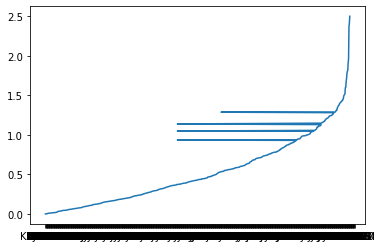

In [169]:
top,bottom = celllines_from_sums(e,f)
top2,bottom2 = celllines_from_diff(e,f)

In [166]:
e,f = uli_list1[2]
c,d = celllines_from_sums(e,f)

first is top, second is bottom


In [34]:
top2

['SNU308',
 'COGN305',
 'KARPAS422',
 'THP1',
 'KO52',
 'SNU182',
 'AML193',
 'DB',
 'BT12',
 'HDMYZ',
 'SUDHL10',
 'YD15',
 'SKUT1',
 'BT16',
 'TTC549',
 'ESO26',
 'FLO1',
 'HMY1',
 'MCC13',
 'UCH2']

In [52]:
data = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")

temp1 = data['CCLE_NAME'].to_list()
# split at space
for i in range(len(temp1)):
    temp1[i] = temp1[i].split("_") 

temp2 = []
for i in range(len(temp1)):
    temp2.append(temp1[i][0])


In [53]:
data['CCLE_NAME'] = temp2

In [90]:
data['CCLE_NAME']

0          MOLM16
1       PATU8988S
2          RCHACV
3         SKMEL31
4           SKBR3
          ...    
1021       HEC151
1022        SNU81
1023          GCT
1024        CMLT1
1025    NIHOVCAR3
Name: CCLE_NAME, Length: 1026, dtype: object

In [49]:
data[data['CCLE_NAME'].str.match('SKMEL31_SKIN')]

,CCLE_NAME,TISSUE_FACTOR,MSI,ACVR1B_mut_del,APC_mut_del,ARID1A_mut_del,ATM_mut_del,ATRX_mut_del,AXIN1_mut_del,BAP1_mut_del,...,PIK3CA_mut,BRAF_mut,CTNNB1_mut,KRAS_mut,NRAS_mut,GNAS_mut,HRAS_mut,EGFR_mut,MAP2K1_mut,PTPN11_mut
3,SKMEL31_SKIN,SKIN,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Keeping only the Celllines in DepMap

In [45]:
effect = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_effect.csv")
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")

mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

effect["INDEX"] = effect.DepMap_ID
effect = effect.set_index('INDEX')
effect = effect.rename(index=mapping)
effect = effect.drop("DepMap_ID",1)

gene = effect.columns.to_list()
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ") 

genes = []
for i in range(len(gene)):
    genes.append(gene[i][0])
                 
effect.columns = genes


cellLine = effect.index.to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines = []
for i in range(len(cellLine)):
    cellLines.append(cellLine[i][0])
    
effect.index = cellLines

cellLine = data['CCLE_Name'].to_list()
# split at space
for i in range(len(cellLine)):
    cellLine[i] = cellLine[i].split("_") 

cellLines1 = []
for i in range(len(cellLine)):
    cellLines1.append(cellLine[i][0])
    
data['CCLE_Name'] = cellLines1


a = set(cellLines)
b = set(data["CCLE_Name"])
c = set.intersection(a,b)

print(len(a))
print(len(b))
print(len(c))

cellL = c

765
1781
765


In [10]:
effect = effect.transpose()
intersect = list(set.intersection(set(allGenes.index.to_list()), set(cellL)))
allGenes = effect[effect.columns.intersection(cellL)]

allGenes.shape
allGenes = allGenes.transpose()

allGenes.head()

NameError: name 'allGenes' is not defined

In [13]:
allGenes.shape
allGenes = allGenes.transpose()

NameError: name 'allGenes' is not defined

In [11]:
intersect = list(set.intersection(set(allGenes.index.to_list()), set(cellL)))

NameError: name 'allGenes' is not defined

In [65]:
allGenes.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


### Now we have the cell lines that are only in DepMap. For these, we also need to update the names, so that we can easily compare which ones have which genetic background,

In [93]:
data.columns

Index(['CCLE_NAME', 'TISSUE_FACTOR', 'MSI', 'ACVR1B_mut_del', 'APC_mut_del',
       'ARID1A_mut_del', 'ATM_mut_del', 'ATRX_mut_del', 'AXIN1_mut_del',
       'BAP1_mut_del', 'BRCA1_mut_del', 'BRCA2_mut_del', 'CASP8_mut_del',
       'CDC73_mut_del', 'CDH1_mut_del', 'CDKN2A_mut_del', 'CEBPA_mut_del',
       'CIC_mut_del', 'CREBBP_mut_del', 'CYLD_mut_del', 'DAXX_mut_del',
       'EP300_mut_del', 'AMER1_mut_del', 'FBXW7_mut_del', 'GATA1_mut_del',
       'HNF1A_mut_del', 'KDM6A_mut_del', 'MAP3K1_mut_del', 'MEN1_mut_del',
       'MLH1_mut_del', 'KMT2C_mut_del', 'MSH2_mut_del', 'MSH6_mut_del',
       'NF1_mut_del', 'NF2_mut_del', 'NOTCH1_mut_del', 'NOTCH2_mut_del',
       'NPM1_mut_del', 'PAX5_mut_del', 'PIK3R1_mut_del', 'PTCH1_mut_del',
       'PTEN_mut_del', 'RB1_mut_del', 'RUNX1_mut_del', 'SMAD2_mut_del',
       'SMAD4_mut_del', 'SMARCA4_mut_del', 'SMARCB1_mut_del', 'SOCS1_mut_del',
       'STK11_mut_del', 'TET2_mut_del', 'TNFAIP3_mut_del', 'TP53_mut_del',
       'TSC1_mut_del', 'VHL_mut_de

In [64]:
data[data['CCLE_NAME'].str.match('YD8')].TP53_mut_del.to_list()

[1]

## It appears to be working  - 29.September

In [16]:
count = []
for _ in top:
    count.append(data[data['CCLE_NAME'].str.match(_)].MSI.to_list())
    
print(count)
#print(count/len(top))

count = [i for j in count for i in j]
print(sum(count)/len(top))

[[0], [0], [0], [0], [0], [1], [0], [], [1], [0], [0], [0], [0], [], [], [0], [0], [], [0], [0]]
0.1


In [ ]:
data = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")

In [35]:
count = []
for _ in top:
    count.append(data[data['CCLE_NAME'].str.match(_)].KRAS_mut.to_list())
    
#print(count)
#print(count/len(top))

count = [i for j in count for i in j]
print(sum(count)/len(top))

count = []
for _ in allGenes.columns.to_list():
    count.append(data[data['CCLE_NAME'].str.match(_)].EGFR_mut.to_list())
    
#print(count)
#print(count/len(top))

count = [i for j in count for i in j]
print(count)
print(sum(count)/len(allGenes))

0.0


#### for KRAS_mut we have 20% in top hits for every interaction of NF2, wheras we find 55% overall.
#### some hits for CDKs have 0% KRAS_mut in the top interactions.

In [97]:
count = []
for _ in allGenes.columns.to_list():
    count.append(data[data['CCLE_NAME'].str.match(_)].EGFR_mut.to_list())
    
#print(count)
#print(count/len(top))

count = [i for j in count for i in j]
print(count)
print(sum(count)/len(allGenes))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.0038314176245210726


In [86]:
count = 0
for _ in top:
    if data[data['CCLE_NAME'].str.match(_)].APC_mut_del.to_list() == 1:
        count += 1

print(count)
print(len(top))

0
20


In [28]:

for _ in top:
    data2 = data[data['CCLE_NAME'].str.match(top)]

print(count)
print(len(genes))

SyntaxError: unmatched ']' (<ipython-input-28-5d98798b7155>, line 2)

In [25]:
data[data['CCLE_NAME'].str.match(top[1])].MSI

623    1
Name: MSI, dtype: int64

In [34]:
# wir duerfen nicht alle zelllinien mitnehmen, nur die DepMap exclusives
sum(data.APC_mut_del)/len(data.APC_mut_del)

0.16569200779727095

In [36]:
len(data.APC_mut_del)    # es sind nicht alle 1026 in DepMap, nur um die 750

1026

In [ ]:
count = 0
for _ in top:
    if data[data.mutationX] == 1:
        count += 1
    return count/len(top)

In [ ]:
def calculate_genetic_background_percentage(cellLines,allcells,background):
    for _ in cellLines:
        # get the percentage of background in these cells
        cellLines_percentage = cellLines[cellLines[]]
    for _ in allcells:
        # get the percentage of backgournd in all cells
        allcells_percentage = allcells[allcells[]]
    # as a first instance, check for overrepresentation comparing these 2 values
    
    print('the background ' + background + ' is found in ' + background_percent + ' of all celllines' )
    print('the background ' + background + ' is found in ' + cellLines_percent + ' of the input celllines') 

In [ ]:
list1 = data[data.TP53_mut_del == 0]["CCLE_NAME"].to_list()
#list1 = [j for i in list1 for j in i]
# split at space
for i in range(len(list1)):
    list1[i] = list1[i].split("_") 

List1 = []
for i in range(len(list1)):
    List1.append(list1[i][0])
    
overlap = set.intersection(set(List1),set(cell_L))

In [81]:
def single_column(df,columns,nameOfNewCol):
    'takes list of columns and returns a Df of values'
    vals = df[columns].values.tolist()
    valsList = [j for x in vals for j in x]
    valsDf = pd.DataFrame(valsList,columns = [nameOfNewCol])
    return valsDf

In [25]:
def compare_groups(mutation,kogene):
    list1 = data[data[mutation] == 1]["CCLE_NAME"].to_list()
    mutation = set.intersection(set(list1),set(cellL))

    list2 = data[data[mutation] == 0]["CCLE_NAME"].to_list()
    noMutation = set.intersection(set(list2),set(cellL))

    ko_gene = effectCellL[effectCellL.index.str.startswith(kogene)]

    Df2 = single_column(ko_gene,mutation,'MUT')

    Df1 = single_column(ko_gene,noMutation,'WT')

    Df = pd.concat([Df1,Df2], axis=1, sort=False)
    Df.boxplot()

In [1]:
#compare_groups("NF2","TP53")

In [28]:
# we cycle through the conditions. for every condition (71), check the percentage in the top cell lines of the two genes, and in all cell lines
# after the function is done, this is a single for loop, or a list comprehension

## Idee:
wir schauen fuer alle paare, jeweils abhaengig vom split, die p-werte des hypergeometrischen tests fuer alle genetischen hintergruende an.
    sind diese signifikant oder nicht? wir lassen einfach ein skript ueber alle 68 hintergrunde fuer alle relevanten paare laufen und geben paar sowie hintergrund aus.
    danach ordnen wir nach p-value und schauen uns die signifikantesten an.
    wichtig: wir nehmen fuer positiv korrelierte nur summen und fuer negativ korrelierte nur differenzen.
    
### dh:
* cutoff festlegen (mit Juergen)
* mit cutoff die zelllinien in 2 sets splitten
* funktion schreiben die einen hypergeometrischen test mit diesen sets macht und das paar sowie den p-value dafuer zurueckgibt.
* danach ordnen und mit Uli durchgehen.

In [65]:
dep = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/Achilles_gene_dependency.csv")

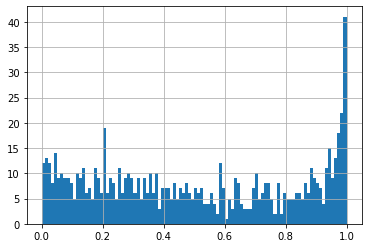

In [69]:
dep['CDK4 (1019)'].hist(bins=100)

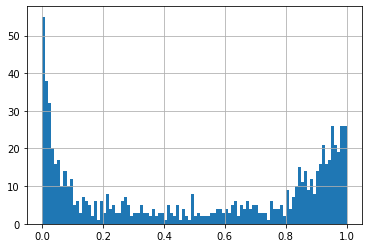

In [71]:
dep['CDK6 (1021)'].hist(bins=100)

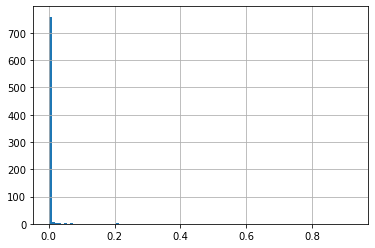

In [72]:
dep['PTEN (5728)'].hist(bins=100)

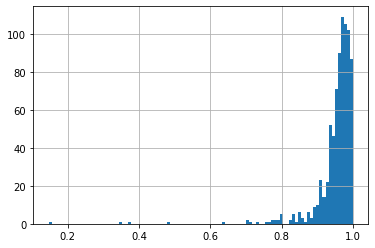

In [73]:
dep['GAPDH (2597)'].hist(bins=100)

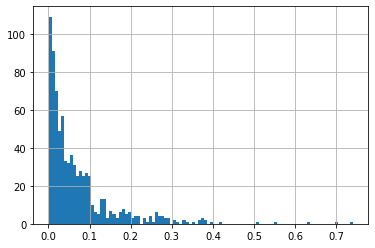

In [74]:
dep['PNPLA2 (57104)'].hist(bins=100)

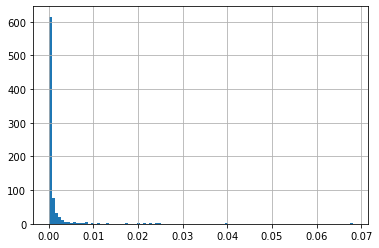

In [75]:
dep['ZNF2 (7549)'].hist(bins=100)

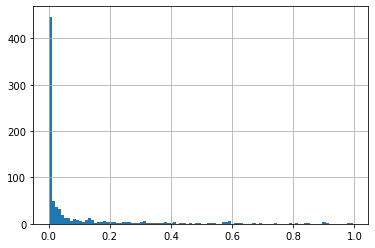

In [80]:
dep['TP53 (7157)'].hist(bins=100)

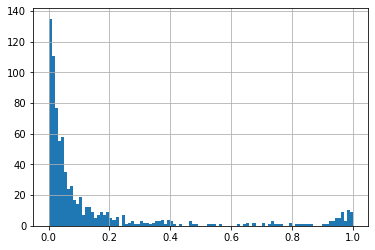

In [76]:
dep['BRAF (673)'].hist(bins=100)

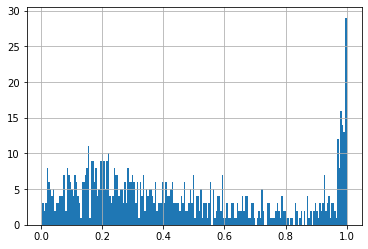

In [111]:
dep['KRAS'].hist(bins=200)

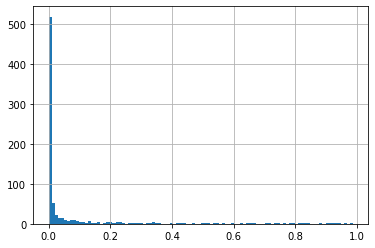

In [109]:
dep['NF2'].hist(bins=100)

In [81]:
dep['NF2 (4771)'].sort_values()

193    0.000000
518    0.000000
383    0.000000
349    0.000000
778    0.000000
         ...   
115    0.934864
741    0.940351
493    0.960218
740    0.980272
187    0.986444
Name: NF2 (4771), Length: 789, dtype: float64

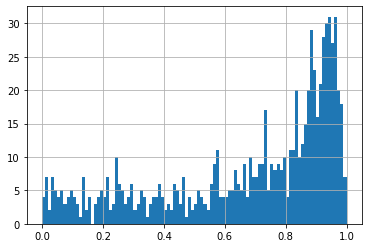

In [79]:
dep['RAC1 (5879)'].hist(bins=100)

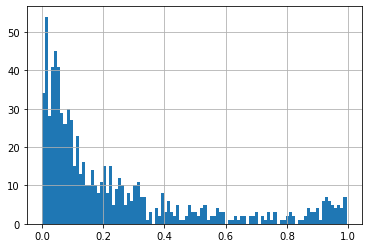

In [82]:
dep['CCND3 (896)'].hist(bins=100)

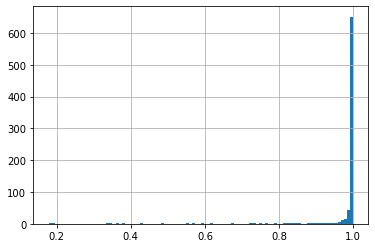

In [83]:
dep['MYC (4609)'].hist(bins=100)

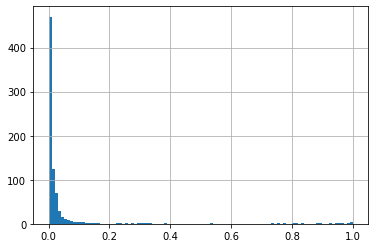

In [84]:
dep['MYCN (4613)'].hist(bins=100)

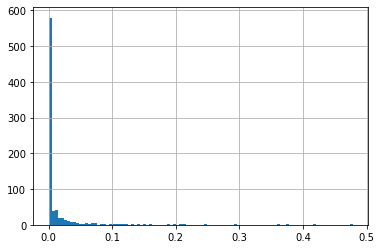

In [85]:
dep['TAOK1 (57551)'].hist(bins=100)

In [174]:
data = pd.read_csv("/home/annerer/Downloads/elife-58925-supp1-v3.csv")


In [175]:
data.head()

,CCLE_NAME,TISSUE_FACTOR,MSI,ACVR1B_mut_del,APC_mut_del,ARID1A_mut_del,ATM_mut_del,ATRX_mut_del,AXIN1_mut_del,BAP1_mut_del,...,PIK3CA_mut,BRAF_mut,CTNNB1_mut,KRAS_mut,NRAS_mut,GNAS_mut,HRAS_mut,EGFR_mut,MAP2K1_mut,PTPN11_mut
0,MOLM16_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PATU8988S_PANCREAS,PANCREAS,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,RCHACV_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,SKMEL31_SKIN,SKIN,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,SKBR3_BREAST,BREAST,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [176]:
effect.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
HEL,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
HEL9217,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
LS513,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
C2BBE1,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
253J,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117


In [181]:
effect.index.values = CLines

AttributeError: can't set attribute

In [177]:
data = pd.read_csv("/home/annerer/Dokumente/DepMap_Mining/sample_info.csv")
data = pretty_gene_names(data)
CLines = list(set.intersection(set(data.CCLE_Name.values),set(effect.index.values)))